# Model Building Process 

In [1]:
# Import the model data set 
import pandas as pd
df = pd.read_csv("Model_data.csv")

In [2]:
## Applying CountVectorizer & TFIDF 
# Extracting features by CountVectorizer from reviews 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
reviews_feature_cv = count_vect.fit_transform(df.JwMarriot_reviews).toarray()
reviews_feature_cv.shape

(3000, 11259)

In [3]:
# Extracting features by TFIDF from reviews
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
reviews_feature_tfidf = tfidf_transformer.fit_transform(reviews_feature_cv).toarray()
reviews_feature_tfidf.shape

(3000, 11259)

In [4]:
## Aplying SMOTE oversampling technique for removing class imbalance 
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state = 50, sampling_strategy = "all")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
X_oversample, y_oversample = over_sample.fit_sample(reviews_feature_cv, df['Sentiments']) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [6]:
# Total count of target classes or 'Sentiments' 
len(y_oversample)

8589

In [7]:
# Total number of reviews features with classes 
X_oversample.shape

(8589, 11259)

In [8]:
# Count of Sentiments or target classes 
import collections, numpy
collections.Counter(y_oversample)

Counter({0: 2863, 1: 2863, 2: 2863})

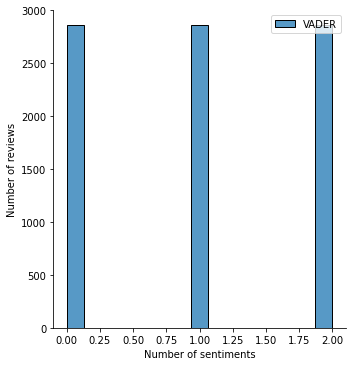

In [9]:
# Sentiments across reviews 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.displot(y_oversample, kde = False,  label = "VADER")
plt.xlabel("Number of sentiments")
plt.ylabel("Number of reviews")
plt.legend()
plt.show()

In [10]:
# Split data into train & test 
def split_into_words(i):
    return (i.split(" "))

In [11]:
seed = 7

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_oversample,y_oversample,test_size=0.2)

In [13]:
x_train.shape

(6871, 11259)

In [14]:
y_train.shape

(6871,)

In [15]:
x_test.shape

(1718, 11259)

In [16]:
y_test.shape

(1718,)

# K-Nearest Neighbours Classifier 

In [22]:
## Nearest Neighbours algorithms
# K-Nearest Neighbors Classifier 
from sklearn.neighbors import KNeighborsClassifier
model14 = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
RgCV_clf= model14.fit(x_train, y_train)

In [23]:
# Testing Accuracy of K-Nearest Neighbors Classifier  
import numpy as np
predicted26 = RgCV_clf.predict(x_test)
np.mean(predicted26 == y_test)

0.6676367869615832

In [24]:
# Training Accuracy of K-Nearest Neighbors Classifier 
import numpy as np
predicted27 = RgCV_clf.predict(x_train) 
np.mean(predicted27 == y_train)

0.9131130839761316

In [25]:
# Testing classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_test, predicted26))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       552
           1       1.00      0.10      0.19       617
           2       0.59      0.97      0.73       549

    accuracy                           0.67      1718
   macro avg       0.77      0.69      0.59      1718
weighted avg       0.78      0.67      0.57      1718



In [26]:
# Training classification report 
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(y_train, predicted27))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      2311
           1       1.00      0.75      0.86      2246
           2       1.00      0.98      0.99      2314

    accuracy                           0.91      6871
   macro avg       0.93      0.91      0.91      6871
weighted avg       0.93      0.91      0.91      6871

